# Supervised learning

<font color='green'>Supervised learning</font>: Uses labeled data

<font color='green'>Unsupervised learning</font>:  Uses unlabeled data. Uncovering hidden patterns and structures from unlabeled data. Example: grouping customers into distinct categories (clustering) without knowing what those categories will be. 

<font color='green'>Reenforcement learning</font>: software agents interact with environment.
	Learn how to optimize their behaviour
	Given a system of rewards and punishments

## Supervised learning

	Predictor variables/features and a target variable. 

	Data usually given in a table form.

	Aim: Predict the target variable, given the predictor variables.

In [5]:
import pandas as pd

path = 'csv_files/'

iris_df = pd.read_csv(path + 'iris.csv', names=['sepal length (cm)', 'sepal width (cm)',
                                                'petal length (cm)', 'petal width (cm)',
                                                'species'])
iris_df.species = iris_df.species.map(lambda x: x[5:])
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


Here first 4 columns contain <font color='green'>predictor variables</font> and the last column is the <font color='green'>target variable</font>

If the target variable consist of categories like 'click'/'no click' or 'spam'/'no spam' or like here, different flower species the task at hand is <font color='green'>classification</font>. And if the target is continuosly varying variable e.g. 'price', 'length' and so on.. its a <font color='green'>regression</font> task.

Naming conventions:
	Features = predictor variable = independent variable

	Target variable = dependent variable = response variable

Supervised learning <font color='red'>goals</font> are:

	automate time-consuming or expensive manual tasks (example: donctors diagnosis)

	make predictions about the future (example: will customer click on ad or not)

### EDA - Exploratory Data Analysis

In [2]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

# load the iris dataset from sklearn datasets
iris = datasets.load_iris()

type(iris)
# bunch is like a dictionary containing key-value pairs

sklearn.utils.Bunch

In [3]:
iris.keys()

# 'DESCR' provides the description of the dataset
# 'data' contains the values features 

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [5]:
iris.data.shape

# 150 rows, 4 columns. Samples are in rows, features in columns

(150, 4)

In [6]:
iris.target[::50], iris.target_names

# the target values are indexed respectively

(array([0, 1, 2]), array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [7]:
# lets assign variables to the data to do the EDA
x = iris.data
y = iris.target

# create a DF
df = pd.DataFrame(data=x, columns=iris.feature_names)

df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


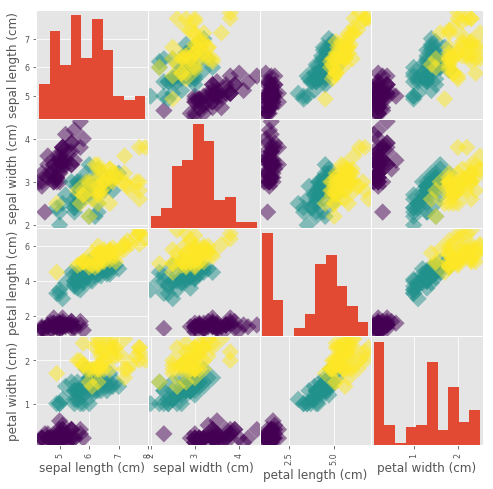

In [8]:
# visual EDA. c is color for each flower species, s is the marker size
_ = pd.plotting.scatter_matrix(frame=df, figsize=[8, 8], c=y, s=150, marker='D')

In [9]:
us_house = pd.read_csv(path + 'house-votes-84.csv', header=None, na_values='?', 
                       names=['party', 'infants', 'water', 'budget', 'physician', 
                              'salvador', 'religious', 'satellite', 'aid', 'missile', 
                              'immigration', 'synfuels', 'education', 'superfund', 
                              'crime', 'duty_free_exports', 'eaa_rsa'])

In [10]:
print(us_house.head(2))

        party infants water budget physician salvador religious satellite aid  \
0  republican       n     y      n         y        y         y         n   n   
1  republican       n     y      n         y        y         y         n   n   

  missile immigration synfuels education superfund crime duty_free_exports  \
0       n           y      NaN         y         y     y                 n   
1       n           n        n         y         y     y                 n   

  eaa_rsa  
0       y  
1     NaN  


In [11]:
us_house = us_house.replace({
    'y': 1,
    'n': 0,
})
print(us_house.head(2))

        party  infants  water  budget  physician  salvador  religious  \
0  republican      0.0    1.0     0.0        1.0       1.0        1.0   
1  republican      0.0    1.0     0.0        1.0       1.0        1.0   

   satellite  aid  missile  immigration  synfuels  education  superfund  \
0        0.0  0.0      0.0          1.0       NaN        1.0        1.0   
1        0.0  0.0      0.0          0.0       0.0        1.0        1.0   

   crime  duty_free_exports  eaa_rsa  
0    1.0                0.0      1.0  
1    1.0                0.0      NaN  


In [12]:
# fill the NaN values
us_house = us_house.fillna(method='ffill')
us_house = us_house.fillna(0)
print(us_house.head(2))

        party  infants  water  budget  physician  salvador  religious  \
0  republican      0.0    1.0     0.0        1.0       1.0        1.0   
1  republican      0.0    1.0     0.0        1.0       1.0        1.0   

   satellite  aid  missile  immigration  synfuels  education  superfund  \
0        0.0  0.0      0.0          1.0       0.0        1.0        1.0   
1        0.0  0.0      0.0          0.0       0.0        1.0        1.0   

   crime  duty_free_exports  eaa_rsa  
0    1.0                0.0      1.0  
1    1.0                0.0      1.0  


In [13]:
us_house.iloc[:, 1:] = us_house.iloc[:, 1:].astype(int)
print(us_house.head(2))

        party  infants  water  budget  physician  salvador  religious  \
0  republican        0      1       0          1         1          1   
1  republican        0      1       0          1         1          1   

   satellite  aid  missile  immigration  synfuels  education  superfund  \
0          0    0        0            1         0          1          1   
1          0    0        0            0         0          1          1   

   crime  duty_free_exports  eaa_rsa  
0      1                  0        1  
1      1                  0        1  


#### Generating a countplot

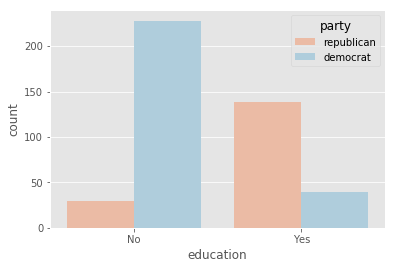

In [14]:
import seaborn as sns
plt.figure()
sns.countplot(x='education', hue='party', data=us_house, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

### The classification challenge

Training a model on the data = 'fitting' a model on the data.

### k-Nearest Neighbours (kNN algorithm)

This chooses a label to a new data point based on 'k' number of data points near it.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

# this requires that there are no missing data in it
knn.fit(X=iris['data'], y=iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

### k-Nearest Neighbors: Fit

In [16]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = us_house['party'].values
X = us_house.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X=X, y=y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

Now that your k-NN classifier with 6 neighbors has been fit to the data, it can be used to predict the labels of new data points.

### k-Nearest Neighbors: Predict

Having fit a k-NN classifier, you can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! You can still use the .predict() method on the X that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

In [17]:
new_xs = np.array([0.102197, 0.715453, 0.846611, 0.058037, 0.91392, 0.501157, 0.826775,
                  0.852858, 0.796519, 0.473253, 0.99571, 0.825454, 0.002318, 0.172422,
                  0.790584, 0.440568])
X_new = pd.DataFrame([new_xs], columns=list(i for i in range(16)))
print(X_new)

         0         1         2         3        4         5         6   \
0  0.102197  0.715453  0.846611  0.058037  0.91392  0.501157  0.826775   

         7         8         9        10        11        12        13  \
0  0.852858  0.796519  0.473253  0.99571  0.825454  0.002318  0.172422   

         14        15  
0  0.790584  0.440568  


In the next video, Hugo will discuss a solution to this problem. For now, a random unlabeled data point has been generated and is available to you as X_new. You will use your classifier to predict the label for this new data point, as well as on the training data X that the model has already seen. Using .predict() on X_new will generate 1 prediction, while using it on X will generate 435 predictions: 1 for each sample.

In [18]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = us_house.party.values
X = us_house.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X=X, y=y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


Did your model predict 'democrat' or 'republican'? How sure can you be of its predictions? In other words, how can you measure its performance? 

### Measuring model performance

In classification, <font color='green'>accuracy</font> is a commonly used metric. Accuracy = fraction of correct predicitons

We could compute the accuracy from the data we used for fitting the classifier but it is not indicative to generalize new data. Thus:
	data is split into training and testing sets

	train the classifier with training set

	make predictions on test set

	compare predictions to known labels

In [19]:
from sklearn.model_selection import train_test_split

X = iris['data']
y = iris['target']

# we randomly split our data. 'random_state' sets a seed for the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X=X_train, y=y_train)

y_pred = knn.predict(X=X_test)

print('Test set predictions:\n {}'.format(y_pred))
print(y_test)
knn.score(X_test, y_test)

Test set predictions:
 [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]
[2 2 2 2 1 0 1 0 0 1 0 2 0 1 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


0.9555555555555556

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping b

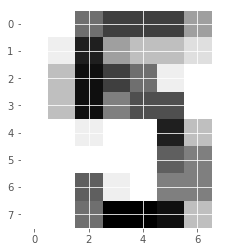

In [20]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display the 1010th digit
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### Train/Test Split + Fit/Predict/Accuracy

In [21]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X=X_train, y=y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


### Overfitting and underfitting

Remember the model complexity curve that Hugo showed in the video? You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

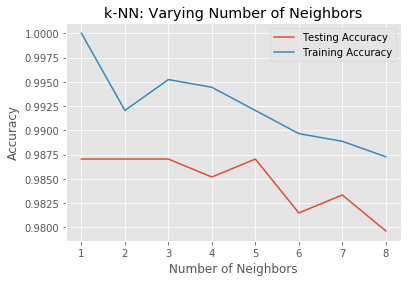

In [22]:
# Create feature and target arrays
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X=X_train, y=y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

 It looks like the test accuracy is highest when using 3 and 5 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data.

## Introduction to Regression

Target value is continuously varying variable, e.g. price of a house, countries gdp.

In [23]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [24]:
print(boston.feature_names)
print('\n' + boston['DESCR'][293:1220])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occu

In [25]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [26]:
# drop the target column. The values attribute converts column values into numpy array
X = boston_df.drop('MEDV', axis=1).values

# select the target
y = boston_df.MEDV.values

Lets try to predict the house value from a single feature RM - average number of rooms per dwelling.

In [27]:
X_rooms = X[:, 5]

# reshape the arrays. Keep first dimension but add another unity dimension in x
y = y.reshape(-1, 1)

X_rooms = X_rooms.reshape(-1, 1)

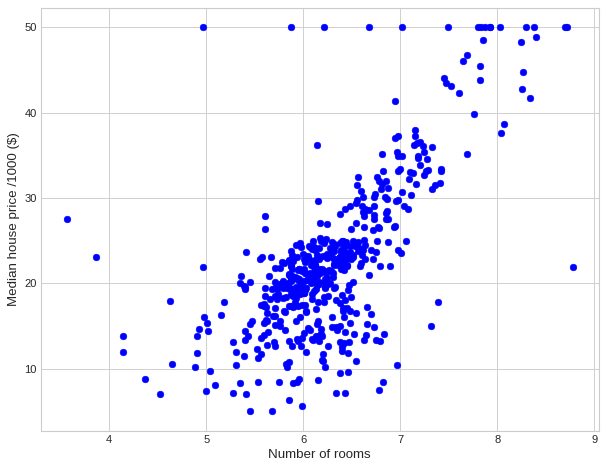

In [28]:
# Plotting house value vs number of rooms

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(9, 7), dpi=80)
plt.scatter(x=X_rooms, y=y, color='blue')
plt.xlabel('Number of rooms')
plt.ylabel('Median house price /1000 ($)')
plt.show()

#### Fitting regression model

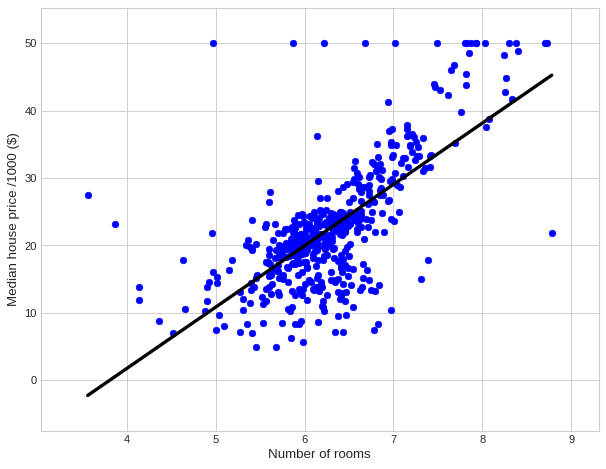

In [29]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(X_rooms, y)

prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)

plt.figure(figsize=(9, 7), dpi=80)

plt.scatter(x=X_rooms, y=y, color='blue')

plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)

plt.xlabel('Number of rooms')
plt.ylabel('Median house price /1000 ($)')
plt.margins(0.1)

plt.show()

In [8]:
import pandas as pd
gm_df = pd.read_csv(path + 'gm_2008_region.csv')

gm_df.head(2)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa


your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population.

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.

In [31]:
# Create arrays for features and target variable
y = gm_df.life.values
X = gm_df.fertility.values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


#### Exploring the Gapminder data

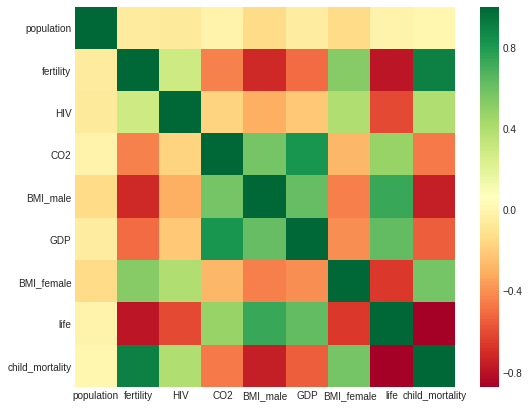

In [32]:
plt.figure(figsize=[9, 7])
sns.heatmap(gm_df.corr(), square=True, cmap='RdYlGn')
# the heatmap was generated using Seaborn's heatmap function 
# and the following line of code, where df.corr() computes the 
# pairwise correlation between columns:
plt.show()

Cells that are in green show positive correlation, while cells that are in red show negative correlation

### The basics of linear regression

In [33]:
# y = ax + b

# y - target
# x - single feature
# a - slope of the line
# b - intercept of the line

How to choose 'a' and 'b'? - Define an error function for any given line and then choose the line that produces least error. Such an error function is called 'loss' or 'cost' function. What would our 'loss' function be? Ordinary Least Squares (OLS): Minimize sum of squares of the residuals.

#### Fit & predict for regression

Now, you will fit a linear regression and predict life expectancy using just one feature. You saw Andy do this earlier using the 'RM' feature of the Boston housing dataset. In this exercise, you will use the 'fertility' feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is 'life'.

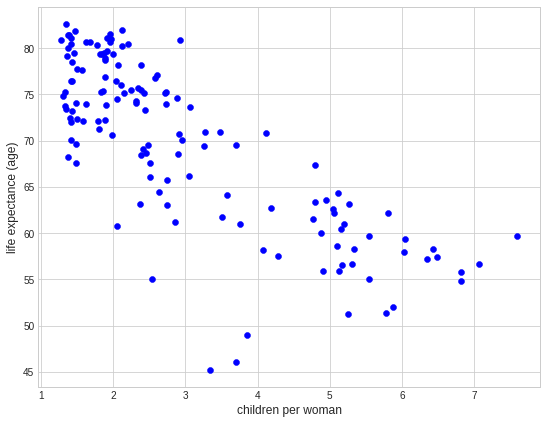

In [34]:
y = gm_df.life.values
X_fertility = gm_df.fertility.values.reshape(-1, 1)


plt.figure(figsize=[9, 7])
plt.scatter(X, y, color='blue')
plt.xlabel('children per woman')
plt.ylabel('life expectance (age)')
plt.show()

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the R2 score using sckit-learn's .score() method.

0.6192442167740035


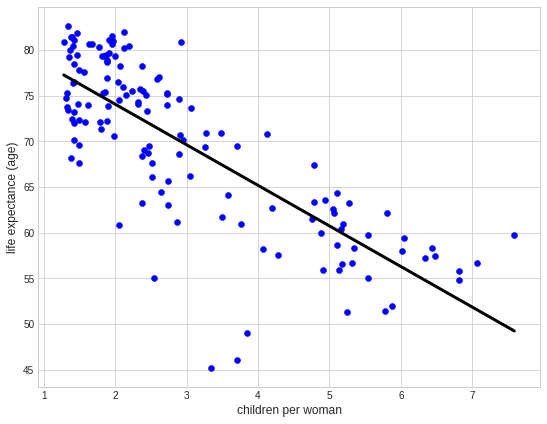

In [35]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1, 1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility,  y))

plt.figure(figsize=[9, 7])
plt.xlabel('children per woman')
plt.ylabel('life expectance (age)')

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.scatter(X, y, color='blue')
plt.show()

### Linear regression in higher dimensions

$$y = a_1x_1 + a_2x_2 + b$$

#### Linear regression on all features

#### Train/test split for regression

n this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the R2 score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models.

In [36]:
# Dropping the Region column which contained strings
gm_df_new = gm_df.drop('Region', axis=1)

# target array
y = gm_df_new.life.values

# feature array
X = gm_df_new.drop('life', axis=1).values

In [37]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731430135
Root Mean Squared Error: 3.2476010800369455


Using all features has improved the model score. This makes sense, as the model has more information to learn from. However, there is one potential pitfall to this process. Can you spot it? 

### Cross-validation

The data is split into 5 equal chuncks. In each run one chunck is taken as the test data and others for training data. Based on that the R^2 calculated is more precise on 5 values. From those mean and median and 95% confident intervals can be calculated. Thus its called 5-fold cross calidation or in general n-fold CV

### Cross-validation in scikit learn

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's cross_val_score() function uses R2 as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.

In [38]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793451


#### K-Fold CV comparison

Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

In [39]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print('3-fold CV: {}'.format(np.mean(cvscores_3)))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print('10-fold CV: {}'.format(np.mean(cvscores_10)))

3-fold CV: 0.8718712782622262
10-fold CV: 0.8436128620131266


In [40]:
%timeit cross_val_score(reg, X, y, cv = 3)

3.94 ms ± 182 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [41]:
%timeit cross_val_score(reg, X, y, cv = 10)

14 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Regularized regression

Lin reg minimizes a loss function, it chooses coefficents for ech feature variable. Large coeficcients can lead to overfitting. Regularization - penalizing large coeficcients.

### Ridge regression

$$\text{Loss function = OLS loss function} + \alpha \cdot \sum_{i=1}^n a_i^2$$

Alpha is the parameter we need to choose in order to predict.

In [42]:
from sklearn.linear_model import Ridge

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=0.1, normalize=True)

ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)

ridge.score(X_test, y_test)

0.8442469959975749

### Lasso regression

$$\text{Loss function = OLS loss function} + \alpha \cdot \sum_{i=1}^n |a_i|$$

In [43]:
from sklearn.linear_model import Lasso

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lasso = Lasso(alpha=0.1, normalize=True)

lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)

lasso.score(X_test, y_test)

0.8721296169613542

### Lasso for feature selection in scikit-learn

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality'],
      dtype='object')


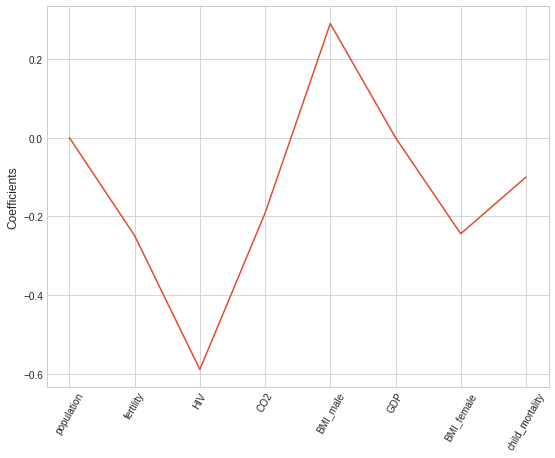

In [44]:
names = gm_df_new.drop('life', axis=1).columns
print(names)

lasso = Lasso(alpha=0.1)

lasso_coef = lasso.fit(X, y).coef_

plt.figure(figsize=[9, 7])
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')

plt.show()

Most important predictor of life expectancy is BMI_male

#### Regularization I: Lasso

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


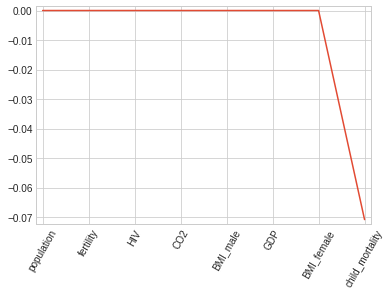

In [45]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names.values, rotation=60)
plt.margins(0.02)
plt.show()

According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy.

#### Regularization II: Ridge

Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1
regularization because the regularization term is the L1

norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the L2
norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated R2 scores for each, using this function that we have defined for you, which plots the R2 score as well as standard error for each alpha:

In [46]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure(figsize=[9,7])
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

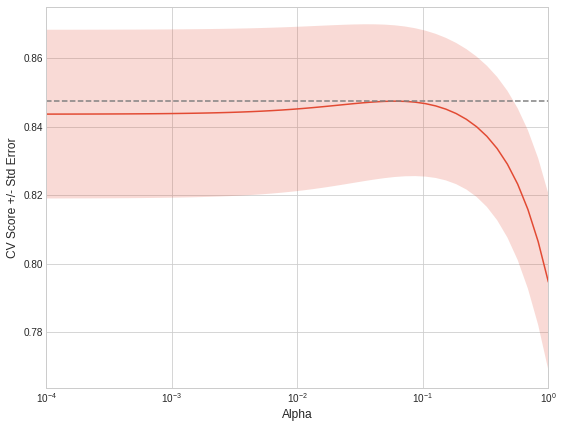

In [47]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

Notice how the cross-validation scores change with different alphas. Which alpha should you pick? How can you fine-tune your model?

## How good is your model?

In classfication problems, accuracy (which computes the fraction of correct predictions) isn't alwasy the best choice. Consider this: Let us assume 99% of emails are real and 1% is spam. If we create a model which predicts the emails to be 100% real we would essentially get 99% accurate model, which is in this case would be useless for us since it does not predict any spam emails. <font color='red'>Class impalance example</font>. Thus we need more nuanced metric to assess our model.

### Metrics for classification  (EXERCISE)

In Chapter 1, you evaluated the performance of your k-NN classifier based on its accuracy. However, as Andy discussed, accuracy is not always an informative metric. In this exercise, you will dive more deeply into evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report.

You may have noticed in the video that the classification report consisted of three rows, and an additional support column. The support gives the number of samples of the true response that lie in that class - so in the video example, the support was the number of Republicans or Democrats in the test set on which the classification report was computed. The precision, recall, and f1-score columns, then, gave the respective metrics for that particular class.

Here, you'll work with the PIMA Indians dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes. 

In [48]:
df = pd.read_csv(path + 'diabetes.csv')
df.head(2)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [49]:
df.isna().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

In [50]:
X = df.drop('diabetes', axis=1)

y = df.diabetes

In [51]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print('Confusion matrix:\n {}'.format(confusion_matrix(y_test, y_pred)))
print('\nClassification report:\n {}'.format(classification_report(y_test, y_pred)))

Confusion matrix:
 [[176  30]
 [ 56  46]]

Classification report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

   micro avg       0.72      0.72      0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



### Logistic regression and the ROC curve

Logistic regression is used in <font color='green'>CLASSIFICATION!!</font> problems, not in regressions problems. We see how it works for binary classification. Logistic regression outputs probabilities 'p'.

	If 'p' > 0.5: the data is labelled '1'

	If 'p' < 0.5: teh data is labelled '0'

#### Building a logistic regression model

ime to build your first logistic regression model! As Hugo showed in the video, scikit-learn makes it very easy to try different models, since the Train-Test-Split/Instantiate/Fit/Predict paradigm applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'. You'll see this now for yourself as you train a logistic regression model on exactly the same data as in the previous exercise. Will it outperform k-NN? There's only one way to find out!

The feature and target variable arrays X and y.

In [52]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print('Confusion matrix:\n {}'.format(confusion_matrix(y_test, y_pred)))
print('\nClassification report:\n {}'.format(classification_report(y_test, y_pred)))

Confusion matrix:
 [[174  32]
 [ 36  66]]

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       206
           1       0.67      0.65      0.66       102

   micro avg       0.78      0.78      0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Plotting an ROC curve

Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. As Hugo demonstrated in the video, most classifiers in scikit-learn have a .predict_proba() method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve. In doing so, you'll make use of the .predict_proba() method and become familiar with its functionality.

Here, you'll continue working with the PIMA Indians diabetes dataset. The classifier has already been fit to the training data and is available as logreg.

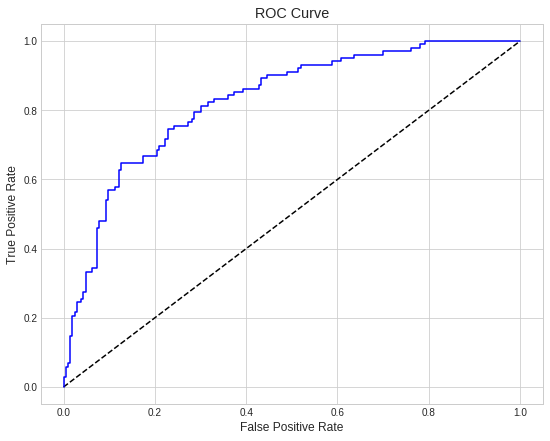

In [53]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# fpr - Increasing false positive rates such that element i 
#       is the false positive rate of predictions with score >= thresholds[i].

# tpr - Increasing true positive rates such that element i 
#       is the true positive rate of predictions with score >= thresholds[i].

# thresholds - Increasing true positive rates such that element i 
#              is the true positive rate of predictions with score >= thresholds[i].

# Plot ROC curve
plt.figure(figsize=[9,7])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### Precision-recall Curve

When looking at your ROC curve, you may have noticed that the y-axis (True positive rate) is also known as recall. Indeed, in addition to the ROC curve, there are other ways to visually evaluate model performance.

#### Area under the ROC curve (AUC)

Larger area under ROC curve = better model.

In [54]:
X.head(1), '---------------', y.head(1)

(   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age
 0            6      148         72       35        0  33.6  0.627   50,
 '---------------',
 0    1
 Name: diabetes, dtype: int64)

#### AUC Computation

Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC, which Hugo discussed in the video, is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

In this exercise, you'll calculate AUC scores using the roc_auc_score() function from sklearn.metrics as well as by performing cross-validation on the diabetes dataset. 

In [55]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1] 

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8268608414239482
AUC scores computed using 5-fold cross-validation: [0.7987037  0.80777778 0.81944444 0.86622642 0.85037736]


/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

You now have a number of different methods you can use to evaluate your model's performance.

### Hyperparameter tuning

When we are doing linear regression we are choosing parameters to fit the data the best. We also needed to choose $\alpha$ for Ridge and Lasso regression. Before doing k-Nearest Neighbors we needed to choose n_neighbors. Such parameters, which needed to be specified before fitting a model (like $\alpha$ and 'k') are called hyperparameters. These are parameters which cannot be learned by fitting the model. Here lies the key for choosing a correct hyperparameter. 

The basic idea is to:
	1) try a bunch of different values for the parameters
	2) fit all them separately
	3) see how well each performs 
	4) choose the best one

When fitting different values of hyperparameter it is essential to use cross-validation. 

#### Grid search cross-validation

Basic idea: We create a grid of possible values for (hyper)parameters and see how they behave together, for example: if we had parameters 'c' and '$\alpha$' the grid of values we'd liek to test would look like this:

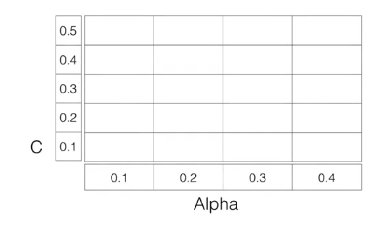

In [56]:
import matplotlib.pyplot as plt
im_path = 'images/'

img = plt.imread(im_path + 'grid_cv.png')

plt.imshow(img)
plt.axis('off') # gets rid of the axes

plt.show()

#### Hyperparameter tuning with GridSearchCV

Hugo demonstrated how to tune the n_neighbors parameter of the KNeighborsClassifier() using GridSearchCV on the voting dataset. You will now practice this yourself, but by using logistic regression on the diabetes dataset instead!

Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: C
. C controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large C can lead to an overfit model, while a small C

can lead to an underfit model.

The hyperparameter space for C
has been setup for you. Your job is to use GridSearchCV and logistic regression to find the optimal C

in this hyperparameter space. The feature array is available as X and target variable array is available as y.

You may be wondering why you aren't asked to split the data into training and test sets. Good observation! Here, we want you to focus on the process of setting up the hyperparameter grid and performing grid-search cross-validation. In practice, you will indeed want to hold out a portion of your data for evaluation purposes, and you will learn all about this in the next video!

In [2]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(solver='liblinear')

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) # something is wrong here, 
# the obtained value should be 3.727 not 268.X

print("Best score is {}".format(logreg_cv.best_score_))

NameError: name 'X' is not defined

#### Hyperparameter tuning with RandomizedSearchCV

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. You'll practice using RandomizedSearchCV in this exercise and see how this works.

Here, you'll also be introduced to a new model: the Decision Tree. Don't worry about the specifics of how this model works. Just like k-NN, linear regression, and logistic regression, decision trees in scikit-learn have .fit() and .predict() methods that you can use in exactly the same way as before. Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: This makes it an ideal use case for RandomizedSearchCV. 

Your goal is to use RandomizedSearchCV to find the optimal hyperparameters.

In [58]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 8}
Best score is 0.7447916666666666


You'll see a lot more of decision trees and RandomizedSearchCV as you continue your machine learning journey. Note that RandomizedSearchCV will never outperform GridSearchCV. Instead, it is valuable because it saves on computation time.

#### Hold-out set in practice I: Classification

Hold-out set is set of data that the model hasen't seen before.

You will now practice evaluating a model with tuned hyperparameters on a hold-out set. The feature array and target variable array from the diabetes dataset have been pre-loaded as X and y.

In addition to C
, logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. Your job in this exercise is to create a hold-out set, tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set.

In [59]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets, he test set here will function as the hold-out set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7673913043478261


/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

#### Hold-out set in practice II: Regression

Remember lasso and ridge regression from the previous chapter? Lasso used the L1 penalty to regularize, while ridge used the L2 penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the L1 and L2

penalties:

a∗L1+b∗L2

In scikit-learn, this term is represented by the 'l1_ratio' parameter: An 'l1_ratio' of 1 corresponds to an L1
penalty, and anything lower is a combination of L1 and L2.

In this exercise, you will GridSearchCV to tune the 'l1_ratio' of an elastic net model trained on the Gapminder data. As in the previous exercise, use a hold-out set to evaluate your model's performance.

In [60]:
gm_df.head(1)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.5962,12314.0,129.9049,75.3,29.5,Middle East & North Africa


In [61]:
X = gm_df.drop(labels=['life', 'Region'], axis=1).values

y = gm_df.life.values

In [62]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460283
Tuned ElasticNet MSE: 10.05791413339844


/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Now that you understand how to fine-tune your models, it's time to learn about preprocessing techniques and how to piece together all the different stages of the machine learning process into a pipeline!

## Preprocessing data

### Dealing with categorical features

Scikit-learn does NOT accept categorical features by default, thus these need to be encoded numerically. This process is called converting to dummy variables. For example:

	0 : Observation was NOT that category
	1 : It was that category

In scikit-learn for Python one can use OneHotEncoder()
pandas: get_dummies()

In [63]:
df_auto = pd.read_csv(path + 'auto.csv')
df_auto.head(1)

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0


In 'df_auto':

	Target variable: mpg (miles per gallon)
	Categorical variable: origin (three possible values: US, Asia, Europe)

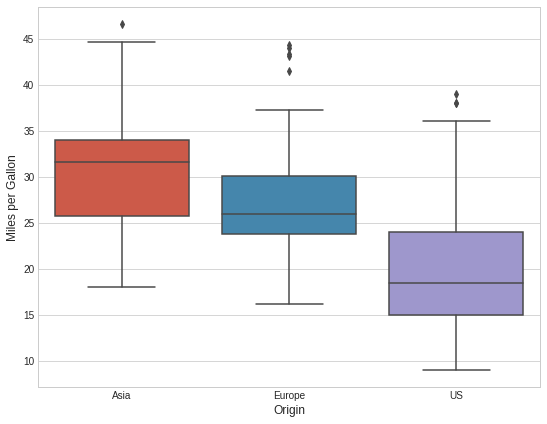

In [64]:
import seaborn as sns

plt.figure(figsize=[9,7])
_ = sns.boxplot(x='origin', y='mpg', data=df_auto, order=['Asia', 'Europe', 'US'])
_ = plt.xlabel('Origin')
_ = plt.ylabel('Miles per Gallon')
plt.show()

### Encoding dummy variables

In [65]:
df_origin = pd.get_dummies(df_auto)

df_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


The origin column is split into three independent columns, each cointaing true values ony for their category. Since we know that 3rd car is not European nor US we can totally delete the 'origin_Asia' column.

In [66]:
df_origin = df_origin.drop('origin_Asia', axis=1)
df_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0


#### Linear regression with dummy variables

In [67]:
X = df_origin.drop('mpg', axis=1).values
y = df_origin.mpg.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)

ridge.score(X_test, y_test)

0.7190645190217895

In [68]:
df_gapm = pd.read_csv(path + 'gm_2008_region.csv')
df_gapm.head(1)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.5962,12314.0,129.9049,75.3,29.5,Middle East & North Africa


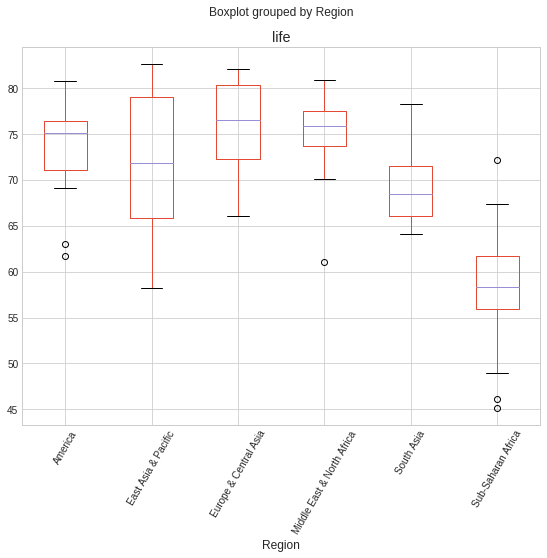

In [69]:
df_gapm.boxplot(column='life', by='Region', rot=60, figsize=[9,7])

plt.show()

#### Creating dummy variables

You saw in the previous exercise that the 'Region' feature contains very useful information that can predict life expectancy. For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. Therefore, if you are trying to predict life expectancy, it would be preferable to retain the 'Region' feature. To do this, you need to binarize it by creating dummy variables

In [70]:
df_region = pd.get_dummies(data=df_gapm)

df_region.columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')

In [71]:
# drop_first argument removes one excess column, for this case the first one: America
df_region = pd.get_dummies(data=df_gapm, drop_first=True)
df_region.columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')

Having created the dummy variables from the 'Region' feature, you can build regression models as you did before. Here, you'll use ridge regression to perform 5-fold cross-validation.

In [72]:
X = df_region.drop('life', axis=1).values
y = df_region.life.values

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


### Handling missing data

In [73]:
df = pd.read_csv(path + 'diabetes.csv')
df.head(2)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


This dataset seems to have non-missing data but zeros, questin marks are missing values

In [75]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


For example, in triceps column 3rd observation has 0 measurement. The skin thicknes cant be 0, neither can insulin be. Thus the data is missing. 

#### Dropping missing data

In [76]:
df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        541 non-null float64
insulin        394 non-null float64
bmi            757 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


One way of dealing with missing data is to drop all the rows that contain NaN values or missing data.

In [77]:
df_rows_dropped = df.dropna()
df_rows_dropped.shape

# such a way though, half of the rows are only left. This is unacceptable

(393, 9)

#### Imputing missing data

To make an educated guess for that missing values. Commonly: use the mean of the non-missing values:

In [78]:
X = df.drop('diabetes', axis=1).values

y = df.diabetes.values

In [5]:
from sklearn.impute import SimpleImputer

# axis=0 means the means are calculated column-wize
imp = SimpleImputer(missing_values='NaN', strategy='mean')

imp.fit(X)

X = imp.transform(X)

NameError: name 'X' is not defined

After transforming the data we can apply our supervised learning model on the data but is there a way we could do both at once? Yes, we can use the scikit learn pipeline object

In [80]:
from sklearn.pipeline import Pipeline

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

reglog = LogisticRegression()

# build the pipeline object. This is done in steps which contains tuples with a name one wants to give
# to the estimator and the estimator object.
steps = [('imputation', imp), ('logisitic_regression', logreg)]

pipeline = Pipeline(steps=steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

pipeline.score(X_test, y_test)

/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7619047619047619

Remember: in a pipeline each step, but the last, must be a transformer and the last one must be an estimator, such as a classifier, regressor or transformer.

## Dropping missing data EXERCISE

The unprocessed dataset has been loaded into a DataFrame df. Explore it in the IPython Shell with the .head() method. You will see that there are certain data points labeled with a '?'. These denote missing values. As you saw in the video, different datasets encode missing values in different ways. Sometimes it may be a '9999', other times a 0 - real-world data can be very messy! If you're lucky, the missing values will already be encoded as NaN. We use NaN because it is an efficient and simplified way of internally representing missing data, and it lets us take advantage of pandas methods such as .dropna() and .fillna(), as well as scikit-learn's Imputation transformer Imputer().

In this exercise, your job is to convert the '?'s to NaNs, and then drop the rows that contain them from the DataFrame.

In [81]:
df = pd.read_csv(path + 'house-votes-84.csv', header=None, 
                       names=['party', 'infants', 'water', 'budget', 'physician', 
                              'salvador', 'religious', 'satellite', 'aid', 'missile', 
                              'immigration', 'synfuels', 'education', 'superfund', 
                              'crime', 'duty_free_exports', 'eaa_rsa'])
print(df.head(2))

        party infants water budget physician salvador religious satellite aid  \
0  republican       n     y      n         y        y         y         n   n   
1  republican       n     y      n         y        y         y         n   n   

  missile immigration synfuels education superfund crime duty_free_exports  \
0       n           y        ?         y         y     y                 n   
1       n           n        n         y         y     y                 n   

  eaa_rsa  
0       y  
1       ?  


In [82]:
df = df.replace({
    'y': 1,
    'n': 0,
})
print(df.head(2))

        party infants water budget physician salvador religious satellite aid  \
0  republican       0     1      0         1        1         1         0   0   
1  republican       0     1      0         1        1         1         0   0   

  missile immigration synfuels education superfund crime duty_free_exports  \
0       0           1        ?         1         1     1                 0   
1       0           0        0         1         1     1                 0   

  eaa_rsa  
0       1  
1       ?  


In [83]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("\nShape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("\nShape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64

Shape of Original DataFrame: (435, 17)

Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


When many values in your dataset are missing, if you drop them, you may end up throwing away valuable information along with the missing data. It's better instead to develop an imputation strategy. This is where domain knowledge is useful, but in the absence of it, you can impute missing values with the mean or the median of the row or column that the missing value is in.

#### Imputing missing data in a ML Pipeline I

As you've come to appreciate, there are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.

You'll now practice setting up a pipeline with two steps: the imputation step, followed by the instantiation of a classifier. You've seen three classifiers in this course so far: k-NN, logistic regression, and the decision tree. You will now be introduced to a fourth one - the Support Vector Machine, or SVM. For now, do not worry about how it works under the hood. It works exactly as you would expect of the scikit-learn estimators that you have worked with previously, in that it has the same .fit() and .predict() methods as before.

In [84]:
# Import the Imputer module and Support Vector Classification
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


####Imputing missing data in a ML Pipeline II

Having setup the steps of the pipeline in the previous exercise, you will now use it on the voting dataset to classify a Congressman's party affiliation. What makes pipelines so incredibly useful is the simple interface that they provide. You can use the .fit() and .predict() methods on pipelines just as you did with your classifiers and regressors! 

In [85]:
X = df.drop('party', axis=1).values
y = df.party.values

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


              precision    recall  f1-score   support

    democrat       0.97      0.97      0.97        36
  republican       0.97      0.97      0.97        34

   micro avg       0.97      0.97      0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70



/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Centering and Scaling

In [86]:
redwine_df = pd.read_csv(path + 'winequality-red.csv', sep=';')
print(redwine_df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

Why scale the data? Here 'total sulfur dioxid' ranges from 6 to 289. Many models use some form of distance to inform them. Example: k-NN model uses distance explicitly when making predicitions. We want features to be on siimilar scale. Thus normalizing is used (scaling, centering).

Ways to normalize your data:

Standardization: Subtract the mean and divide by variance so that all features are centered around zer	o and have variance one

Can also subtract the minimum and divide by the range of the data, in such a way the data is normalize	d having max value 1 and min value 0. 

Can normalize so that the data ranges from -1 to 1

#### Scaling in scikit-learn

In [87]:
X = redwine_df.drop('quality', axis=1).values
y = redwine_df.quality.values

from sklearn.preprocessing import scale

X_scaled = scale(X)

print('Features mean: {}'.format(np.mean(X)))
print('Features std: {}'.format(np.std(X)))
print('\nScaled mean: {}'.format(np.mean(X_scaled)))
print('Scaled std: {}'.format(np.std(X_scaled)))

Features mean: 8.134219224515322
Features std: 16.726533979432848

Scaled mean: 2.546626531486538e-15
Scaled std: 1.0


In [88]:
X.shape, y.shape

((1599, 11), (1599,))

#### Scaling in pipeline

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps=steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

knn_scaled = pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Scaled accuracy: {}'.format(accuracy))

knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

print('Unscaled score: {}'.format(knn_unscaled.score(X_test, y_test)))

Scaled accuracy: 0.615625
Unscaled score: 0.49375


#### Cross-Validation and scaling in pipeline

In [90]:
steps = [('sclaer', StandardScaler()), ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps=steps)

# define our hyperparameter space as a dictionary
parameters = dict(knn__n_neighbors=np.arange(1, 50))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# perform a grid-search
cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

print('Best parameter: {}'.format(cv.best_params_))
print('\nScore: {}'.format(cv.score(X_test, y_test)))
print('\n{}'.format(classification_report(y_test, y_pred)))

/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameter: {'knn__n_neighbors': 1}

Score: 0.634375

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.18      0.12      0.15        16
           5       0.66      0.72      0.69       127
           6       0.68      0.60      0.64       131
           7       0.63      0.69      0.66        42
           8       0.25      0.33      0.29         3

   micro avg       0.63      0.63      0.63       320
   macro avg       0.40      0.41      0.40       320
weighted avg       0.63      0.63      0.63       320



## EXERCISES

### Centering and scaling your data

In the video, Hugo demonstrated how significantly the performance of a model can improve if the features are scaled. Note that this is not always the case: In the Congressional voting records dataset, for example, all of the features are binary. In such a situation, scaling will have minimal impact.

You will now explore scaling for yourself on a new dataset - White Wine Quality! Hugo used the Red Wine Quality dataset in the video. We have used the 'quality' feature of the wine to create a binary target variable: If 'quality' is less than or equal to 5, the target variable is 1, and otherwise, it is 0.

The DataFrame has been pre-loaded as df, along with the feature and target variable arrays X and y. Explore it in the IPython Shell. Notice how some features seem to have different units of measurement. 'density', for instance, takes values between 0.98 and 1.04, while 'total sulfur dioxide' ranges from 9 to 440. As a result, it may be worth scaling the features here. Your job in this exercise is to scale the features and compute the mean and standard deviation of the unscaled features compared to the scaled features.

In [91]:
whitewine_df = pd.read_csv(path + 'white-wine.csv')
whitewine_df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [92]:
whitewine_df.quality = whitewine_df.quality.apply(lambda x: True if x <= 5 else False)

In [93]:
print(whitewine_df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

In [94]:
X = whitewine_df.drop('quality', axis=1).values
y = whitewine_df.quality.values

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 18.432687072460002
Standard Deviation of Unscaled Features: 41.54494764094571
Mean of Scaled Features: 2.7314972981668206e-15
Standard Deviation of Scaled Features: 0.9999999999999999


####Centering and scaling in a pipeline

With regard to whether or not scaling is effective, the proof is in the pudding! See for yourself whether or not scaling the features of the White Wine Quality dataset has any impact on its performance. You will use a k-NN classifier as part of a pipeline that includes scaling, and for the purposes of comparison, a k-NN classifier trained on the unscaled data has been provided.

The feature array and target variable array have been pre-loaded as X and y. Additionally, KNeighborsClassifier and train_test_split have been imported from sklearn.neighbors and sklearn.model_selection, respectively.

In [95]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps=steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.7700680272108843
Accuracy without Scaling: 0.6979591836734694


####Bringing it all together I: Pipeline for classification

It is time now to piece together everything you have learned so far into a pipeline for classification! Your job in this exercise is to build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.

You'll return to using the SVM classifier you were briefly introduced to earlier in this chapter. The hyperparameters you will tune are C
and gamma. C controls the regularization strength. It is analogous to the C you tuned for logistic regression in Chapter 3, while gamma controls the kernel coefficient: Do not worry about this now as it is beyond the scope of this course.

The following modules have been pre-loaded: Pipeline, svm, train_test_split, GridSearchCV, classification_report, accuracy_score. The feature and target variable arrays X and y have also been pre-loaded.

In [96]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.7795918367346939
              precision    recall  f1-score   support

       False       0.83      0.85      0.84       662
        True       0.67      0.63      0.65       318

   micro avg       0.78      0.78      0.78       980
   macro avg       0.75      0.74      0.74       980
weighted avg       0.78      0.78      0.78       980

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}


####Bringing it all together II: Pipeline for regression

For this final exercise, you will return to the Gapminder dataset. Guess what? Even this dataset has missing values that we dealt with for you in earlier chapters! Now, you have all the tools to take care of them yourself!

Your job is to build a pipeline that imputes the missing data, scales the features, and fits an ElasticNet to the Gapminder data. You will then tune the l1_ratio of your ElasticNet using GridSearchCV.

All the necessary modules have been imported, and the feature and target variable arrays have been pre-loaded as X and y.

In [97]:
df_gapm.head(1)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.5962,12314.0,129.9049,75.3,29.5,Middle East & North Africa


In [98]:
X = df_gapm.drop(['life', 'Region'], axis=1).values
y = df_gapm.life.values

df_gapm.isna().sum()

population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
Region             0
dtype: int64

In [99]:
# Setup the pipeline steps: steps
steps = [('imp', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinat

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016570888217


/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/tonu_ilves/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:5

You have now mastered the fundamentals of supervised learning with scikit-learn!